In [3]:
# import libraries
import igraph as ig
import pandas as pd

Willkommen zum dritten Python-Problem Set in diesem Modul!  
Sie finden hier eine Aufgabe (*Exercise 6*) zu Inhalten aus Kapitel 3 *Social Network Analysis* - konkret zu dem Teil 3.2 *Zentralität in Netzwerken*.

# Exercise 6

Im Skript haben Sie am Beispiel eines Terrornetzwerks verschiedene Zentralitätsmaße kennengelernt. In dieser Aufgabe werden Sie R dazu nutzen, diese Zentralitätsmaße nicht nur auf einzelne wenige Knoten, sondern auf den gesamten Graphen anzuwenden.

---
Laden Sie den Datensatz, der die Beziehungen der Terroristen nach Krebs (2002) beschreibt, indem Sie den folgenden Code ausführen.

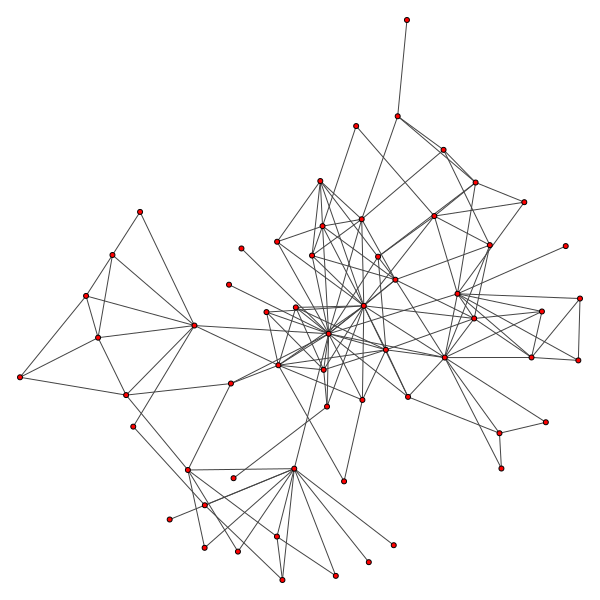

In [4]:
# {"6_1"}
#Laden des Datensatzes "Terrornetzwerk_Datensatz.csv"
terrornet = pd.read_csv("Terrornetzwerk_Datensatz.csv", sep=";", header=None)
#Erstellen des Graphen g_terrornet
g_terrornet = ig.Graph.DataFrame(edges=terrornet, directed=False)
#Plotten des Graphen g_terrornet
ig.plot(g_terrornet, vertex_label_dist=0.2, vertex_size = 5, vertex_label_size=0.8)

Das Netzwerk besteht aus den 19 Flugzeugentführern des Anschlags am 11. September 2001 und weiteren verbündeten Terroristen (Krebs, 2002). Insgesamt sind 60 Terroristen mit 151 Verbindungen berücksichtigt. Im Laufe dieser Aufgabe wollen wir herausfinden, welche der hier erfassten Terroristen in diesem Netzwerk eine **zentrale** Rolle spielen - in Bezug auf
* die **Anzahl der direkten Kontakte** im Terrornetzwerk 
* die **Kürze der Distanz** zu allen anderen Kontakten 
* die Rolle bei der **Weitergabe von Informationen**

## a) Degree Centrality

In einem ungerichteten Netzwerk lässt sich die Zentralität eines Knotens beispielsweise über die (ungerichtete) **Degree Centrality** bestimmen. Sie gibt die *Anzahl der direkten Nachbarn des betrachteten Knotens* an - bezieht sich also auf den ersten der drei oben genannten Kontexte - und bestimmt sich über die folgende Formel:
$$C_D(n_i)=\sum_{j=1, i \neq j}^{|N|} A_{ij}$$

In R können Sie dieses Zentralitätsmaß bereits mit einem Ihnen bekannten Befehl berechnen lassen: dem Befehl zur Ermittlung der Anzahl der aus- bzw. eingehenden Kanten eines Knotens *degree(graph, v)* mit *v* als betrachtetem Knoten. Per default werden im Argument *v* alle Knoten des Netzwerkes betrachtet. In einem Fall weicht der Befehl jedoch von dem zur Berechnung des Node Degree ab: Falls der Knoten eine Kante zu sich selbst (Schleife) besitzt, so darf diese nicht berücksichtigt werden. In der Funktion *degree* erreicht man dies durch das Argument *loops=FALSE* (per default auf *TRUE* gesetzt).  
Sie können diesen Befehl auch dazu verwenden, die **normierte Degree Centrality** $C_D'(n_i)$ zu berechnen. Dazu müssen Sie zusätzlich das Argument *normalized* verwenden und es auf *TRUE* setzen (per default auf *FALSE* gesetzt).

- - -
*Aufgabe:* Im nächsten Code-Chunk sollen sowohl die Degree Centrality, als auch die normierte Degree Centrality für alle Knoten des (ungerichteten) Terrornetzwerks berechnet und anschließend in absteigender Reihenfolge sortiert werden. Damit erhalten Sie eine Auskunft darüber, welche Knoten die meisten direkten Kontakte besitzen. Dazu benötigen Sie unter anderem die Funktion *sort(x, decreasing)*, welche den Vektor *x* sortiert zurückgibt - in absteigender Reihenfolge (*decreasing=TRUE*) oder aufsteigender Reihenfolge (*decreasing=FALSE*, die Default-Einstellung von *sort*).
- - -

In [5]:
# {r "6_2"}
#Berechnen Sie die Degree Centrality für alle Knoten in g_terrornet
#und speichern Sie die Werte in der Variable C_D_terror
C_D_terror = g_terrornet.degree()
#Verfahren Sie analog für die normierte Degree Centrality und
#speichern Sie das Ergebnis in der Variable C_Dnorm_terror
C_Dnorm_terror = [degree / g_terrornet.maxdegree() for degree in C_D_terror]
#Geben Sie zuerst die ersten sechs Werte des absteigend sortierten 
#Vektors C_D_terror aus und verfahren Sie anschließend analog 
#mit dem Vektor C_Dnorm_terror; Verwenden Sie dazu die Befehle head und sort
#und speichern Sie die Werte in den Variablen C_D_terror_main bzw. 
#C_Dnorm_terror_main
#Tipp: head gibt per default sechs Zeilen zurück
C_D_terror_main = sorted(C_D_terror, reverse=True)[0:6]
C_Dnorm_terror_main = sorted(C_Dnorm_terror, reverse=True)[0:6]
#Lassen Sie sich beide Variablen ausgeben
print(C_D_terror_main)
print(C_Dnorm_terror_main)

[22, 18, 13, 11, 11, 10]
[1.0, 0.8181818181818182, 0.5909090909090909, 0.5, 0.5, 0.45454545454545453]


Bei dem hier betrachteten Netzwerk handelt es sich um ein ungerichtetes Netzwerk. Für *gerichtete Netzwerke* unterscheidet man - wie Sie im Skript bereits erfahren haben - die **(normierte) In-Degree** und die **(normierte) Out-Degree Centrality**. Diese beiden Zentralitätsmaße lassen sich jedoch ebenfalls mit dem Befehl *degree(graph, v, mode, loops=FALSE, normalized)* in R berechnen. Das Argument *mode*, welches bei ungerichteten Graphen ignoriert wird, muss hier entsprechend auf *"in"* (für In-Degree Centrality) bzw. *"out"* (für Out-Degree Centrality) gesetzt werden.

*Anmerkung: Die folgenden beiden Zentralitätsmaße - Closeness Centrality und Betweenness Centrality - werden im Rahmen dieser Veranstaltung lediglich für ungerichtete Netzwerke betrachtet.*

### b) Closeness Centrality
Ein weiteres Zentralitätsmaß ist die **Closeness Centrality**. Sie ist eine hilfreiche Messgröße, um zu bestimmen, wie schnell ein Terrorist mit den anderen Verbündeten im Netzwerk Informationen austauschen kann: Je größer die Closeness Centrality, desto *kürzer sind die Informationswege zu allen anderen Terroristen*. Die Closeness Centrality
$$C_C(n_i)=\frac{1}{\sum_{j \neq i}d(n_i,n_j)}$$
kann im Package *'igraph'* mit dem Befehl *closeness(graph, vids, weights, normalized)* ermittelt werden. Dabei bezeichnet *vids* die Knoten, für die $C_C$ bestimmt werden soll (per default alle Knoten des Netzwerks) und mit dem Argument *normalized=TRUE* kann die *normierte Closeness Centrality* bestimmt werden.  
Nun stellt sich die Frage, welche der im Netzwerk erfassten Terroristen am gefährlichsten in Bezug auf die Geschwindigkeit der Informationsweitergabe sind.
- - -
*Aufgabe:* Ermitteln Sie dies auf analoge Weise zum letzten Code-Chunk. Da das grundsätzliche Vorgehen sich hier wiederholt, sind Teile des Codes bereits vorgegeben.
- - - 

In [6]:
# {"6_3"}
#Berechnen Sie die Closeness Centrality für alle Knoten in g_terrornet
#und speichern Sie die Werte in der Variable C_C_terror
C_C_terror = g_terrornet.closeness(normalized=False)
#Verfahren Sie analog für die normierte Closeness Centrality und
#speichern Sie das Ergebnis in der Variable C_Cnorm_terror
C_Cnorm_terror = g_terrornet.closeness(normalized=True)
#Ermittlung der ersten sechs Werte des absteigend sortierten 
#Vektors C_C_terror bzw. C_Cnorm_terror; 
#Speichern der Werte in den Variablen C_C_terror_main bzw. 
#C_Cnorm_terror_main
C_C_terror_main = sorted(C_C_terror, reverse=True)[0:6]
C_Cnorm_terror_main = sorted(C_Cnorm_terror, reverse=True)[0:6]
#Ausgabe der beiden Variablen
C_C_terror_main
C_Cnorm_terror_main

[0.6020408163265306,
 0.48360655737704916,
 0.4573643410852713,
 0.4573643410852713,
 0.44360902255639095,
 0.43703703703703706]

Auch die Closeness Centrality kann für gerichtete Netzwerke berechnet werden. Da sie die kürzesten Pfade betrachtet, bietet der Befehl *closeness* erneut im Argument *mode* drei Möglichkeiten an: *"in"* zur Betrachtung der im Knoten *eingehenden* Kanten, *"out"* zur Betrachtung der vom Knoten *ausgehenden* Kanten und *"all"* zur Betrachtung *ungerichteter* Kanten an Stelle der gerichteten. Das soll an dieser Stelle jedoch nicht weiter vertieft werden.

## c) Betweenness Centrality

Abschließend bleibt die Frage, über welche hier erfassten Terroristen am meisten Informationen geleitet werden, da sie *auf vielen kürzesten Verbindungen zwischen anderen Terroristen* liegen. Dazu betrachten wir die im Skript für ungerichtete Netzwerke eingeführte **Betweenness Centrality**
$$C_B(n_i) = \sum_{j=1, i \neq j}^{|N|} \sum_{k>j, k \neq i}^{|N|} \frac{g_{jk}(n_i)}{g_{jk}}$$
Im Package *'igraph'* kann $C_B(n_i)$ mit dem Befehl *betweenness(graph, v, weights, normalized)* bestimmt werden. Dabei steht *v* für die Knoten, die betrachtet werden und mit *normalized=TRUE* erhält man die **normierte Betweenness Centrality** $C_B'(n_i)$.
- - -
*Aufgabe:* Wenden Sie die entsprechenden Befehle an, um die (normierte) Betweenness Centrality für jedes Mitglied des Terroristennetzwerks zu ermitteln. Auch hier ist der Code gegeben, welcher die zentralsten Mitglieder in Bezug auf die Informationsweitergabe identifiziert und ihre Zentralitätsmaße ausgibt.
- - - 

In [ ]:
# {"6_4"}
#Berechnen Sie die Betweenness Centrality für alle Knoten in g_terrornet
#und speichern Sie die Werte in der Variable C_B_terror
C_B_terror = g_terrornet.betweenness()
#Verfahren Sie analog für die normierte Betweenness Centrality und
#speichern Sie das Ergebnis in der Variable C_Bnorm_terror
C_Bnorm_terror <- betweenness(graph=g_terrornet, normalized = TRUE)
#Ermittlung der ersten sechs Werte des absteigend sortierten 
#Vektors C_B_terror bzw. C_Bnorm_terror;
#Speichern der Werte in den Variablen C_B_terror_main bzw.
C_B_terror_main <- head(x=sort(x=C_B_terror, decreasing = TRUE))
C_Bnorm_terror_main <- head(x=sort(x=C_Bnorm_terror, decreasing = TRUE))
#Ausgabe der beiden Variablen
C_B_terror_main
C_Bnorm_terror_main

- - -
*Aufgabe:* Ziehen Sie nun ein Resumé aus den drei Analysen, indem Sie die erhaltenen Namen miteinander vergleichen. Der Befehl *names(x)* gibt die Namen der Elemente des Vektors *x* zurück und mit dem Operator *==* können Sie auf Gleichheit prüfen.
- - - 

In [ ]:
# {"6_5"}
#Vergleichen Sie die Namen von C_D_terror_main und C_C_terror_main
names(x=C_D_terror_main) == names(x=C_C_terror_main)
#Vergleichen Sie die Namen von C_C_terror_main und C_B_terror_main
names(x=C_C_terror_main) == names(x=C_B_terror_main)
#Lassen Sie sich die Namen von C_D_terror_main ausgeben
C_D_terror_main

Quiz: Welcher Terrorist ist der Analyse nach der zentralste Knoten des Netzwerks? Verwenden Sie bitte dieselbe Schreibweise wie im Vektor C_D_terror_main.

Answer: Mohamed_Atta

## d) Prestige-basierte Zentralitätsmaße: Eigenvector Centrality und Google's PageRank

Testen wir nun, ob dieser Knoten auch nach der Eigenvector Centrality als zentral eingestuft wird. Gerade bei diesem Zentralitätsmaß ist R besonders hilfreich, da die händische Berechnung hier schlecht möglich ist.  
Der Befehl *eigen_centrality(graph, directed, weights)* aus dem Package *'igraph'* bestimmt die Eigenvector Centrality aller Knoten für gerichtete sowie ungerichtete Graphen. Dies kann mit dem Argument *directed* spezifiziert werden, welches per default auf *FALSE* gesetzt ist. Zu beachten ist, dass der Befehl eine Liste zurückgibt, in deren erstem Element die Eigenvector Centralities enthalten sind. Die weiteren Elemente der Liste sollen für uns im Moment keine weitere Rolle spielen. 
- - -
*Aufgabe:* Wenden Sie im folgenden Code-Chunk den Befehl an. Beachten Sie, dass das Argument *weights* im betrachteten Netzwerk keine Rolle spielt, da es sich um ein ungewichtetes Netzwerk handelt.
- - -

In [9]:
# {"6_6"}
#Berechnen Sie die Eigenvector Centrality für alle Knoten von g_terrornet
#und speichern Sie die ausgegebene Liste in der Variable C_E_terror
C_E_terror =g_terrornet.eigenvector_centrality()

Der Befehl *which.max(x)* bestimmt (für einen benannten Vektor *x*) den Index (und den Namen) des größten Elements in *x*. Im folgenden Code-Chunk wird er dazu verwendet, den Knoten im Terrornetzwerk mit der größten Eigenvector Centrality zu bestimmen.
- - -
*Aufgabe:* Ihre Aufgabe ist es, den zugehörigen Wert der Eigenvector Centrality - d.h. den maximalen Eigenvector Centrality-Wert im gesamten Netzwerk - auszugeben.  
*Tipp: Beachten Sie die Schreibweise für den Zugriff auf das erste Listenelement von C_E_terror und verwenden Sie dieselbe Schreibweise in Ihrem Befehl.*
- - -

In [18]:
# {"6_7"}
#Bestimmung des Knotens mit der größten Eigenvector Centrality
print(C_E_terror.index(max(C_E_terror)) + 1)
#Bestimmung dieses größten Eigenvector Centrality-Werts im Netzwerk
print(max(C_E_terror))

36
0.9999999999999999


Wie Sie sehen, ist dieser Knoten sogar bezüglich des vierten Zentralitätsmaßes der zentralste Knoten.

Zum Abschluss dieser Aufgabe wenden wir Google's PageRank-Algorithmus auf einen *gerichteten Graphen* an: Dazu beschäftigen wir uns erneut dem Netzwerk *UKfaculty* aus dem Package *'igraphdata'*. Laden Sie erneut das Package *'igraphdata'* sowie das igraph-Objekt *UKfaculty* und plotten Sie den Graphen, indem Sie den folgenden Code ausführen.

In [ ]:
# {"6_8"}
#Laden des Packages 'igraphdata'
library(igraphdata)
#Laden des Datensatzes UKfaculty
data("UKfaculty")
#Plotten des Graphen
plot(x=UKfaculty, vertex.size = 5, vertex.label.cex=0.8, edge.arrow.size = 0.4)

Der Befehl *page_rank(graph, vids, weights)* aus dem Package *'igraph'* bestimmt den PageRank der Knoten, die in *vids* angegeben werden (per default alle). Auch hier wird, wie bei der Eigenvector Centrality, eine Liste zurückgegeben, in deren erstem Element die PageRanks der Knoten enthalten sind. Die weiteren Elemente der Liste sollen für uns im Moment keine weitere Rolle spielen. 
- - -
*Aufgabe:* Wenden Sie nun im nächsten Code-Chunk den PageRank-Algorithmus auf den Graphen *UKfaculty* an.
- - -

In [ ]:
# {"6_9"}
#Berechnen Sie den PageRank für alle Knoten von UKfaculty
#und speichern Sie die resultierende Liste in der Variable C_R_UKfaculty
C_R_UKfaculty <- page_rank(graph=UKfaculty)
#Geben Sie mit dem Befehl head die ersten sechs Elemente des
#ersten Listenelements (die PageRanks) von C_R_UKfaculty aus
#Tipp: Werfen Sie nochmals einen Blick auf den zweiten Code-Chunk in 6d)
head(x=C_R_UKfaculty[[1]])
#Geben Sie das Maximum des ersten Listenelements (die PageRanks) 
#von C_R_UKfaculty aus
max(x=C_R_UKfaculty[[1]])